<a href="https://www.kaggle.com/code/avirupsahawhy/ewc-training-with-odd-and-even-datas-in-mnist?scriptVersionId=218098380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
from torchvision import datasets,transforms
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
train_dataset=datasets.MNIST(root="./data",train=True,download=True,transform=transform)
test_dataset=datasets.MNIST(root="./data",train=False,download=True,transform=transform)

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 9912422/9912422 [00:00<00:00, 16207224.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28881/28881 [00:00<00:00, 477178.95it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1648877/1648877 [00:00<00:00, 4418975.69it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4542/4542 [00:00<00:00, 7164546.36it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Assuming train_dataset and test_dataset are already defined
# One-hot encode the targets first
# train_targets = F.one_hot(train_dataset.targets, num_classes=10).float()
train_targets = train_dataset.targets.float()
test_targets = test_dataset.targets.float()

train_data=train_dataset.data.float()
test_data=test_dataset.data.float()

import pandas as pd
y_train_df = pd.DataFrame(train_targets.numpy())
y_test_df = pd.DataFrame(test_targets.numpy())

# Apply one-hot encoding
train_targets_onehot = torch.from_numpy(pd.get_dummies(train_targets.numpy()).to_numpy()).float()
test_targets_onehot = torch.from_numpy(pd.get_dummies(test_targets.numpy()).to_numpy()).float()

test_targets.shape,test_data.shape,test_targets_onehot.shape

(torch.Size([10000]), torch.Size([10000, 28, 28]), torch.Size([10000, 10]))

In [3]:

train_targets.shape,train_data.shape,train_targets_onehot.shape

(torch.Size([60000]), torch.Size([60000, 28, 28]), torch.Size([60000, 10]))

In [4]:
x_even=[]
y_even=[]
x_odd=[]
y_odd=[]
for idx,i in enumerate(train_targets):
    
    if i%2==0:
        x_even.append(train_data[idx])
        y_even.append(train_targets_onehot[idx])
    else:
        x_odd.append(train_data[idx])
        y_odd.append(train_targets_onehot[idx])
len(x_even)+len(x_odd)

60000

In [5]:
len(x_even),len(x_odd)

(29492, 30508)

In [6]:
x_test_even=[]
y_test_even=[]
x_test_odd=[]
y_test_odd=[]
for idx,i in enumerate(test_targets):
    
    if i%2==0:
        x_test_even.append(test_data[idx])
        y_test_even.append(test_targets_onehot[idx])
    else:
        x_test_odd.append(test_data[idx])
        y_test_odd.append(test_targets_onehot[idx])
len(x_test_even)+len(x_test_odd)

10000

In [7]:
import torch
from torch.utils.data import DataLoader, TensorDataset
device="cuda"
# Stack the lists into tensors
x_odd_tensor = torch.stack(x_odd).to(device)
y_odd_tensor = torch.stack(y_odd).to(device)
x_even_tensor = torch.stack(x_even).to(device)
y_even_tensor = torch.stack(y_even).to(device)
x_test_odd_tensor = torch.stack(x_test_odd).to(device)
y_test_odd_tensor = torch.stack(y_test_odd).to(device)
x_test_even_tensor = torch.stack(x_test_even).to(device)
y_test_even_tensor = torch.stack(y_test_even).to(device)

# Create TensorDatasets for odd and even data
train_odd_dataset = TensorDataset(x_odd_tensor, y_odd_tensor)
train_even_dataset = TensorDataset(x_even_tensor, y_even_tensor)
test_odd_dataset = TensorDataset(x_test_odd_tensor, y_test_odd_tensor)
test_even_dataset = TensorDataset(x_test_even_tensor, y_test_even_tensor)

# Create DataLoaders for odd and even data
train_odd_loader = DataLoader(train_odd_dataset, batch_size=1000, shuffle=True)
train_even_loader = DataLoader(train_even_dataset, batch_size=1000, shuffle=True)
test_odd_loader = DataLoader(test_odd_dataset, batch_size=1000, shuffle=False)
test_even_loader = DataLoader(test_even_dataset, batch_size=1000, shuffle=False)


small_dataset = TensorDataset(x_odd_tensor[:250], y_odd_tensor[:250])
small_odd_loader=DataLoader(small_dataset, batch_size=1, shuffle=True)

print(f"Train Odd DataLoader shapes: X - {train_odd_loader.dataset.tensors[0].shape}, Y - {train_odd_loader.dataset.tensors[1].shape}")
print(f"Train Even DataLoader shapes: X - {train_even_loader.dataset.tensors[0].shape}, Y - {train_even_loader.dataset.tensors[1].shape}")
print(f"Test Odd DataLoader shapes: X - {test_odd_loader.dataset.tensors[0].shape}, Y - {test_odd_loader.dataset.tensors[1].shape}")
print(f"Test Even DataLoader shapes: X - {test_even_loader.dataset.tensors[0].shape}, Y - {test_even_loader.dataset.tensors[1].shape}")
print(f"x_odd_tensor shape: {x_odd_tensor.shape}")
print(f"y_odd_tensor shape: {y_odd_tensor.shape}")
print(f"x_even_tensor shape: {x_even_tensor.shape}")
print(f"y_even_tensor shape: {y_even_tensor.shape}")
print(f"x_test_odd_tensor shape: {x_test_odd_tensor.shape}")
print(f"y_test_odd_tensor shape: {y_test_odd_tensor.shape}")
print(f"x_test_even_tensor shape: {x_test_even_tensor.shape}")
print(f"y_test_even_tensor shape: {y_test_even_tensor.shape}")


Train Odd DataLoader shapes: X - torch.Size([30508, 28, 28]), Y - torch.Size([30508, 10])
Train Even DataLoader shapes: X - torch.Size([29492, 28, 28]), Y - torch.Size([29492, 10])
Test Odd DataLoader shapes: X - torch.Size([5074, 28, 28]), Y - torch.Size([5074, 10])
Test Even DataLoader shapes: X - torch.Size([4926, 28, 28]), Y - torch.Size([4926, 10])
x_odd_tensor shape: torch.Size([30508, 28, 28])
y_odd_tensor shape: torch.Size([30508, 10])
x_even_tensor shape: torch.Size([29492, 28, 28])
y_even_tensor shape: torch.Size([29492, 10])
x_test_odd_tensor shape: torch.Size([5074, 28, 28])
y_test_odd_tensor shape: torch.Size([5074, 10])
x_test_even_tensor shape: torch.Size([4926, 28, 28])
y_test_even_tensor shape: torch.Size([4926, 10])


In [8]:
import torch.nn as nn
import torch.nn.functional as F

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()  # Flatten layer
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer to hidden layer
        self.fc3= nn.Linear(hidden_size,hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)  # Hidden layer to output layer

    def forward(self, x):
        x = self.flatten(x)        # Flatten the input for fully connected layers
        x = F.relu(self.fc1(x))   # Apply ReLU activation
        x= F.relu(self.fc3(x))
        x= F.relu(self.fc3(x))
        x = self.fc2(x)           # Output layer
        return x

# Initialize the model
input_size = 28 * 28  # MNIST images are 28x28
hidden_size = 128     # Number of neurons in the hidden layer (adjustable)
output_size = 10       # Since we are splitting even and odd, max 5 classes per dataset
model = SimpleNN(input_size, hidden_size, output_size)
model.to(device)
# Print model summary
print(model)
epoch_losses=[]
acca=[]
accb=[]


SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [9]:
import torch.optim as optim

# Define loss function and optimizer
loss_function = nn.CrossEntropyLoss()  # Suitable for multi-class classification
learning_rate = 0.001  # Learning rate for the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)



# Print a summary of the components
print("Loss Function:", loss_function)
print("Optimizer:", optimizer)
print("Initialized loss tracking list: epoch_losses =", epoch_losses)


Loss Function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Initialized loss tracking list: epoch_losses = []


In [10]:
def t_accuracy(predicted, labels):
    """
    Computes accuracy for a batch of predictions.

    Args:
    - predicted (Tensor): Predicted class indices (from the model's output).
    - labels (Tensor): Ground truth class indices (not one-hot encoded).

    Returns:
    - accuracy (float): Accuracy for the batch.
    """
    correct = (predicted == labels).sum().item()  # Compare predicted with true labels
    accuracy = correct / labels.size(0)  # Accuracy = correct / total samples
    return accuracy

def test_accuracy(dataloader):
    model.eval()  # Set the model to evaluation mode
    acc = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs.float())  # Model's raw output (logits)
            _, predicted = torch.max(outputs, 1)  # Get the predicted class labels
            _, labels_indices = torch.max(labels, 1)  # Convert one-hot encoded labels to indices
            acc.append(t_accuracy(predicted, labels_indices))  # Calculate accuracy
    
    accuracy = sum(acc) / len(acc)  # Calculate average accuracy across batches
    return accuracy
test_accuracy(test_even_loader)

0.22320431965442764

In [11]:
from tqdm import tqdm

# Number of epochs to train
def train(dataloader):
    num_epochs = 10
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        epoch_loss = 0  # Initialize epoch loss to 0
    
        # Wrap the DataLoader with tqdm for progress bar
        with tqdm(dataloader, desc=f"Epoch {epoch + 1}/{num_epochs}", unit="batch") as pbar:
            for inputs, labels in pbar:
                inputs, labels = inputs.to(device).float(), labels.to(device)  # Move to device
                
                # Forward pass
                outputs = model(inputs)
                loss = loss_function(outputs, labels)  # Compute batch loss
                
                # Backward pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                # Accumulate batch loss
                epoch_loss += loss.item()
                
                # Update tqdm description with batch loss
                pbar.set_postfix({"Loss": f"{loss.item():.4f}"})
        
        # Calculate and store average loss for the epoch
        epoch_losses.append(epoch_loss / len(dataloader))
        acca.append(test_accuracy(test_even_loader))
        accb.append(test_accuracy(test_odd_loader))
        print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {epoch_losses[-1]:.4f}")


In [12]:
def get_fisher_diag(model, dataset, params, empirical=True):
    fisher = {}
    for n, p in deepcopy(params).items():
        p.data.zero_()
        fisher[n] = Variable(p.data)

    model.eval()
    for input, gt_label in dataset:
        model.zero_grad()
        output = model(input).view(1, -1)
        if empirical:
            # Ensure gt_label is a 1D tensor with class indices
            label = gt_label.max(1)[1] if gt_label.ndim > 1 else gt_label
        else:
            # Use predicted labels (also a 1D tensor)
            label = output.max(1)[1].view(-1)
        negloglikelihood = F.nll_loss(F.log_softmax(output, dim=1), label)
        negloglikelihood.backward()

        for n, p in model.named_parameters():
            fisher[n].data += p.grad.data ** 2 / len(dataset)

    fisher = {n: p for n, p in fisher.items()}
    return fisher


def get_ewc_loss(model, fisher, p_old):
    loss = 0
    for n, p in model.named_parameters():
        _loss = fisher[n] * (p - p_old[n]) ** 2
        loss += _loss.sum()
    return loss


def trainewc(dataloader):
    num_epochs = 10
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        epoch_loss = 0  # Initialize epoch loss to 0
    
        # Wrap the DataLoader with tqdm for progress bar
        with tqdm(dataloader, desc=f"Epoch {epoch + 1}/{num_epochs}", unit="batch") as pbar:
            for inputs, labels in pbar:
                inputs, labels = inputs.to(device).float(), labels.to(device)  # Move to device
                
                # Forward pass
                outputs = model(inputs)
                loss = loss_function(outputs, labels) +lamb*get_ewc_loss(model, fisher_matrix, p_old)*(2**epoch) # Compute batch loss
                
                # Backward pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                # Accumulate batch loss
                epoch_loss += loss.item()
                
                # Update tqdm description with batch loss
                pbar.set_postfix({"Loss": f"{loss.item():.4f}"})
        
        # Calculate and store average loss for the epoch
        epoch_losses.append(epoch_loss / len(dataloader))
        acca.append(test_accuracy(test_even_loader))
        accb.append(test_accuracy(test_odd_loader))
        print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {epoch_losses[-1]:.4f}")



In [13]:
model = SimpleNN(input_size, hidden_size, output_size)
model.to(device)


SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
learning_rate = 0.001  # Learning rate for the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train(train_odd_loader)

from torch.autograd import Variable
from copy import deepcopy
params = {n: p for n, p in model.named_parameters() if p.requires_grad}
p_old = {}
lamb=5000
for n, p in deepcopy(params).items():
    p_old[n] = Variable(p.data)
small_odd_dataset = TensorDataset(x_odd_tensor[:500], y_odd_tensor[:500])
small_odd_loader=DataLoader(small_odd_dataset, batch_size=1, shuffle=True)
fisher_matrix = get_fisher_diag(model, small_odd_loader, params)
# ewc_loss = get_ewc_loss(model, fisher_matrix, p_old)
loss_function = nn.CrossEntropyLoss()  # Suitable for multi-class classification
learning_rate = 0.00007  # Learning rate for the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
trainewc(train_even_loader)

Epoch 1/10: 100%|██████████| 31/31 [00:00<00:00, 55.82batch/s, Loss=0.2053]


Epoch 1/10, Average Loss: 0.7563


Epoch 2/10: 100%|██████████| 31/31 [00:00<00:00, 110.19batch/s, Loss=0.1324]


Epoch 2/10, Average Loss: 0.1444


Epoch 3/10: 100%|██████████| 31/31 [00:00<00:00, 70.11batch/s, Loss=0.0982]


Epoch 3/10, Average Loss: 0.0963


Epoch 4/10: 100%|██████████| 31/31 [00:00<00:00, 110.45batch/s, Loss=0.0774]


Epoch 4/10, Average Loss: 0.0736


Epoch 5/10: 100%|██████████| 31/31 [00:00<00:00, 111.30batch/s, Loss=0.0499]


Epoch 5/10, Average Loss: 0.0567


Epoch 6/10: 100%|██████████| 31/31 [00:00<00:00, 111.63batch/s, Loss=0.0219]


Epoch 6/10, Average Loss: 0.0434


Epoch 7/10: 100%|██████████| 31/31 [00:00<00:00, 112.80batch/s, Loss=0.0442]


Epoch 7/10, Average Loss: 0.0381


Epoch 8/10: 100%|██████████| 31/31 [00:00<00:00, 109.95batch/s, Loss=0.0194]


Epoch 8/10, Average Loss: 0.0292


Epoch 9/10: 100%|██████████| 31/31 [00:00<00:00, 110.67batch/s, Loss=0.0177]


Epoch 9/10, Average Loss: 0.0222


Epoch 10/10: 100%|██████████| 31/31 [00:00<00:00, 70.05batch/s, Loss=0.0212]


Epoch 10/10, Average Loss: 0.0179


Epoch 1/10: 100%|██████████| 30/30 [00:00<00:00, 92.35batch/s, Loss=9.1433]


Epoch 1/10, Average Loss: 15.6897


Epoch 2/10: 100%|██████████| 30/30 [00:00<00:00, 103.49batch/s, Loss=5.3301]


Epoch 2/10, Average Loss: 7.9396


Epoch 3/10: 100%|██████████| 30/30 [00:00<00:00, 101.10batch/s, Loss=4.0061]


Epoch 3/10, Average Loss: 5.8154


Epoch 4/10: 100%|██████████| 30/30 [00:00<00:00, 103.96batch/s, Loss=2.8737]


Epoch 4/10, Average Loss: 4.3622


Epoch 5/10: 100%|██████████| 30/30 [00:00<00:00, 93.43batch/s, Loss=1.9496]


Epoch 5/10, Average Loss: 2.9927


Epoch 6/10: 100%|██████████| 30/30 [00:00<00:00, 99.96batch/s, Loss=1.3995]


Epoch 6/10, Average Loss: 2.0902


Epoch 7/10: 100%|██████████| 30/30 [00:00<00:00, 67.47batch/s, Loss=1.2154]


Epoch 7/10, Average Loss: 1.6386


Epoch 8/10: 100%|██████████| 30/30 [00:00<00:00, 101.31batch/s, Loss=0.9858]


Epoch 8/10, Average Loss: 1.4149


Epoch 9/10: 100%|██████████| 30/30 [00:00<00:00, 102.50batch/s, Loss=1.0140]


Epoch 9/10, Average Loss: 1.3509


Epoch 10/10: 100%|██████████| 30/30 [00:00<00:00, 98.63batch/s, Loss=0.9407]


Epoch 10/10, Average Loss: 1.3519


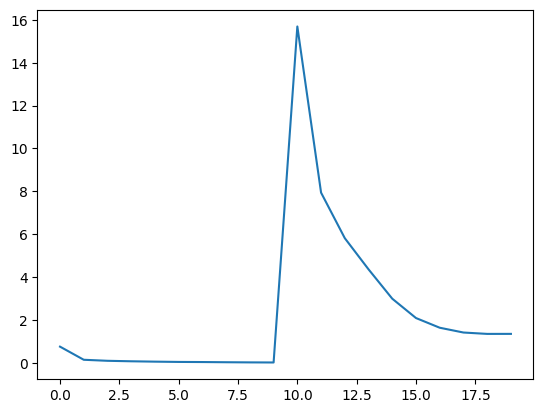

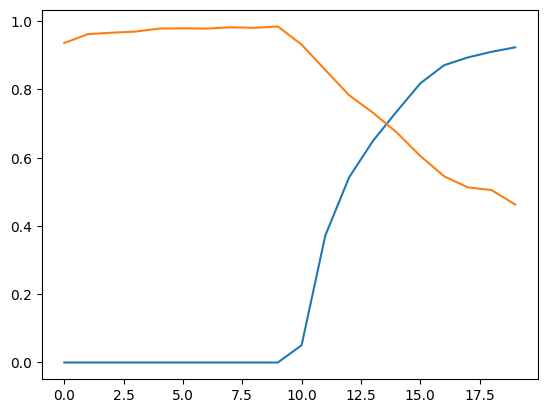

In [15]:

plt.plot(epoch_losses)
plt.show()
plt.plot(acca)
plt.plot(accb)
plt.show()

500,1000,2000,5000,dum stuf,multiplying epoch,7000,multiplying smthin to power epoch; increase smol size from 250 to 500;increase smthin to power epoch to 2 power epoch and using 5000 data samples for fisher;tried with 5 power epoch too much ;3 power epoch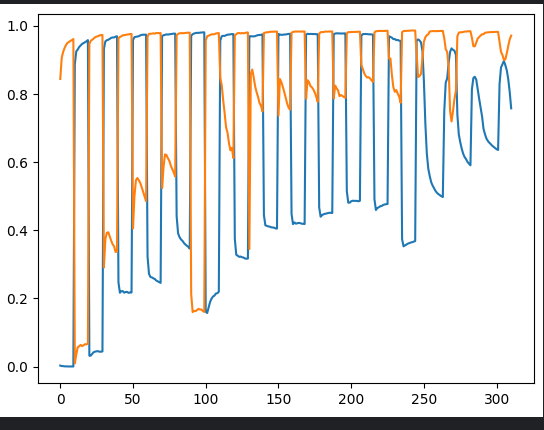 something started going bad after 5 power smthin


last update 1.8 power epoch
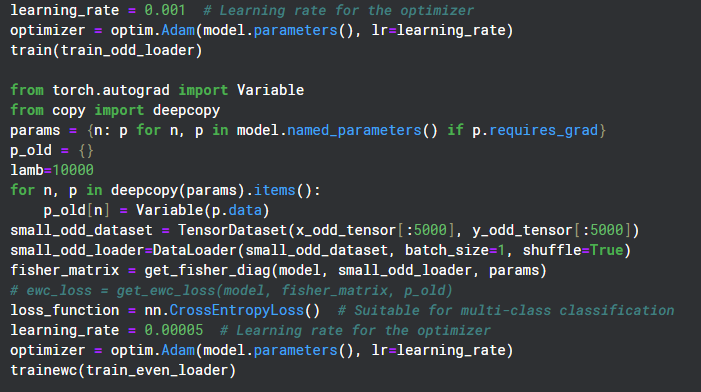
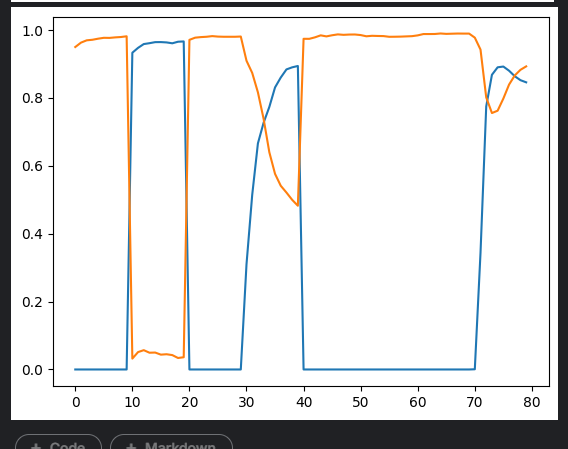
reducing lr works better
